Project Description: To predict the weekly sales of 45 Walmart stores provided by Walmart in their official data.

Data Description: We have historical sales data for 45 Walmart stores located in different regions.
1) stores.csv: This file contains anonymized information about the 45 stores, indicating the type and size of store.
2) train.csv: This is the historical training data, which covers to 2010-02-05 to 2012-11-01.
3) features.csv: This file contains additional data related to the store, department, and regional activity for the given    dates. 

DataSet Link: https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

 


In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
%matplotlib inline 

In [2]:
#Loading the datasets 
train_data = pd.read_csv('C:/Users/yajur/Desktop/DIS/dsp/DSPProject1/train.csv')
features = pd.read_csv('C:/Users/yajur/Desktop/DIS/dsp/DSPProject1/features.csv')
stores = pd.read_csv('C:/Users/yajur/Desktop/DIS/dsp/DSPProject1/stores.csv')

In [3]:
#Generating Summary statistics and exploring the data. 
print(train_data.head())
print(train_data.describe())
print(train_data.info())
print(features.head())
print(stores.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Week

We want to identify if store type has any impact on weekly sales, so we have plotted a bar graph between store type and weekly sales. 
We can observe from the below plot that average weekly sales of type A stores are maximum and type C stores are minimum.

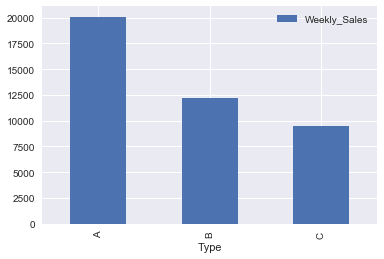

In [4]:
#Merging the train data and store data and then grouping the data based on store type. 
store_data = pd.merge(stores, train_data, on = ['Store'], how = 'left')
grouped_stores = store_data.groupby('Type', as_index = False)['Weekly_Sales'].mean()
grouped_stores.plot(kind='bar', x = 'Type', y = 'Weekly_Sales')

In [5]:
#Converting the date column to datetime 
features['Date'] = pd.to_datetime(features['Date'])
train_data['Date'] = pd.to_datetime(train_data['Date'])

We want to understand the sales pattern of various departments during holiday period. 
We choose Christmas and thanksgiving as they are 2 most noted holidays. 
We have plotted the line chart as it gives clearer picture about sales per department.
From the below graph we can notice that sales of some of the departments are extremely high whearas sales for some departments are relatively low. We can also see that the sales of department 72 shoots up on christmas as well as thanksgiving.

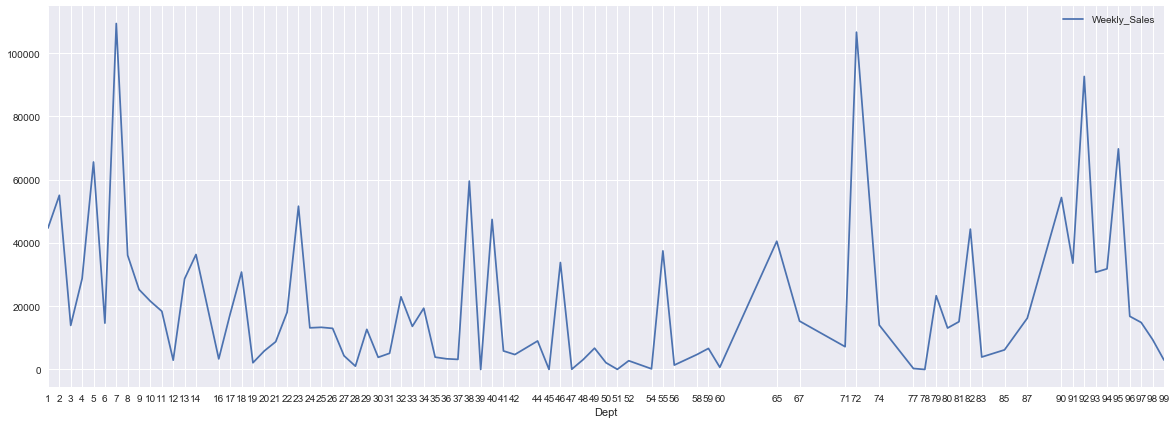

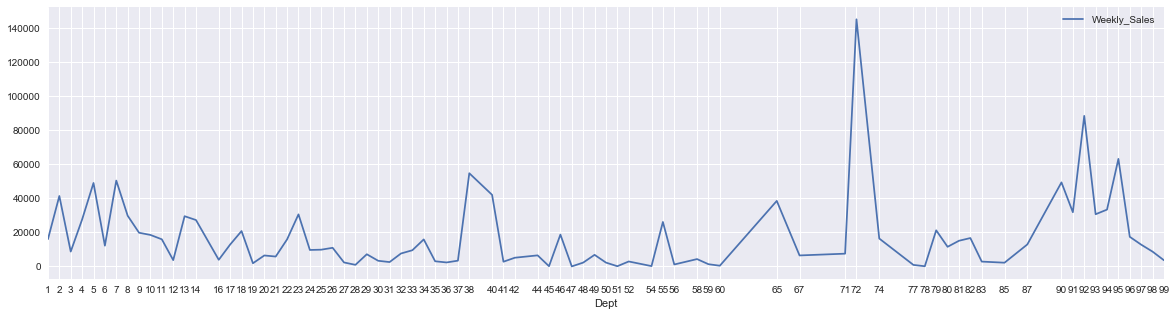

In [8]:
#Taken the sales of 2 weeks before Christmas. Group by department, graph shows mean sales of each department in the span of 14 days before Christmas
margin = dt.timedelta(days = 14)
christmas_data = train_data.loc[((dt.date(2010,12,25) - margin < train_data.Date)&(train_data.Date < dt.date(2010,12,25)))|((dt.date(2011,12,25) - margin < train_data.Date)&(train_data.Date < dt.date(2011,12,25)))]
christmas_data = christmas_data.groupby('Dept', as_index = False)['Weekly_Sales'].mean()
christmas_data.plot(x = 'Dept', y = 'Weekly_Sales', figsize = (20,7), xticks = christmas_data.Dept)

#Taken the sales of 2 weeks before Thanksgiving. Group by department, graph shows mean sales of each department in the span of 14 days before Thanksgiving
thanksgiving_data = train_data.loc[((dt.date(2010,11,30) - margin < train_data.Date)&(train_data.Date < dt.date(2010,11,30)))|((dt.date(2011,11,30) - margin < train_data.Date)&(train_data.Date < dt.date(2011,11,30)))]
thanksgiving_data = thanksgiving_data.groupby('Dept', as_index = False)['Weekly_Sales'].mean()
thanksgiving_data.plot(x = 'Dept', y = 'Weekly_Sales', figsize = (20,5), xticks = thanksgiving_data.Dept)

We are adding a new week column corresponding to each week so that we can plot a continuous graph of weekly sales for all the stores for each year. 
We choose to plot line graph as it is easier to compare sales of each year using this plot. 
From the plot we can observe that the weekly sales for each years follow similar pattern and hence it can be an important factor to predict weekly sales.
We can also notice the spike in the sales for christmas and thanksgiving week. 

        Date  Weekly_Sales  Week
0 2010-02-05  16836.121997   5.0
1 2010-02-12  16352.056032   6.0
2 2010-02-19  16216.658979   7.0
3 2010-02-26  14899.549688   8.0
4 2010-03-05  15921.015727   9.0


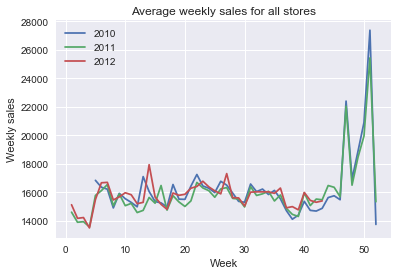

In [14]:
#Done the week numbering to get the number of week according to the corresponding date. Ex, if the date is 2nd Feb then week 5 is running 
weekly_sales = train_data.groupby('Date', as_index = False)['Weekly_Sales'].mean()
weekly_sales['Date'] = pd.to_datetime(weekly_sales['Date'])
weekly_sales.loc[weekly_sales.Date.dt.year == 2010, 'Week'] = [i for i in range(5,53)]
weekly_sales.loc[weekly_sales.Date.dt.year == 2011, 'Week'] = [i for i in range(1,53)]
weekly_sales.loc[weekly_sales.Date.dt.year == 2012, 'Week'] = [i for i in range(1,44)]
print(weekly_sales.head())

#Plotted average weekly sales of all stores and departments to depict the relationship between sales of each year
#As we can see from the graph, the weekly sales of a year is related to weekly sales of the previous year
#Hence weekly sales of a year can be used to predict the weekly sales of next year
fig, ax = plt.subplots()
ax.set_title('Average weekly sales for all stores')
ax.set_xlabel('Week')
ax.set_ylabel('Weekly sales')
plt.plot('Week', 'Weekly_Sales', data = weekly_sales[weekly_sales.Date.dt.year == 2010])
plt.plot('Week', 'Weekly_Sales', data = weekly_sales[weekly_sales.Date.dt.year == 2011])
plt.plot('Week', 'Weekly_Sales', data = weekly_sales[weekly_sales.Date.dt.year == 2012])
plt.legend(['2010', '2011', '2012'], loc='upper left')
plt.show()

We merge the train data and features datasets as they have some factors which might affect weekly sales. 
To get more insight about the relevant factors we performed correlation and plotted heatmap as it gives good graphical picture of correlation of various attributes.
From the heatmap we can observe that temperature and isHoliday are relatively more correlated with weekly sales.

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50          0        42.31       2.572   
1      1     1 2010-02-12      46039.49          1        38.51       2.548   
2      1     1 2010-02-19      41595.55          0        39.93       2.514   
3      1     1 2010-02-26      19403.54          0        46.63       2.561   
4      1     1 2010-03-05      21827.90          0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


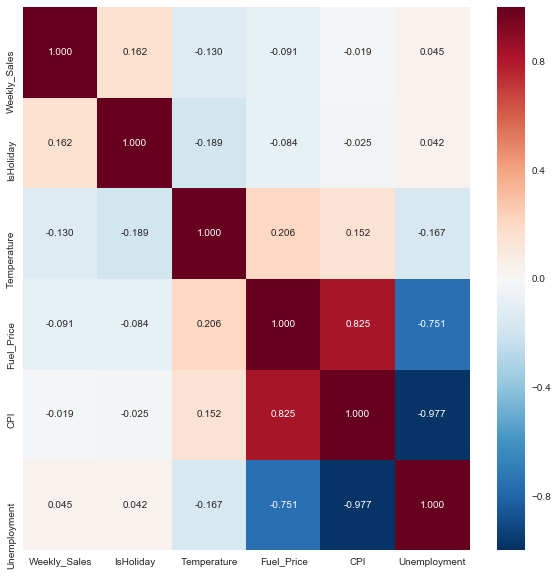

In [6]:
#Merged the datasets train_data and stores, keeping stores as the index
sales_data = pd.merge(train_data, features, how = 'left', on = ['Store', 'Date', 'IsHoliday'])
sales_data.isnull().sum()

#Dropped the irrevelant columns as markdown data was only present since november 2011 hence we can not use it to predict weekly sales
sales_data.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

#Converted the categorical variable is_holiday to numerical
holiday_encoded, is_holiday = sales_data['IsHoliday'].factorize()
sales_data['IsHoliday'] = holiday_encoded

#Converting date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
print(sales_data.head())

#Plotted heatmap to find the co-relation between different variables. The variables Temperature and isHoliday have some
#corelation with Weekly_Sales so they can be used in the model
corr = sales_data.groupby('Date', as_index = False).mean().iloc[:, 3:9].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, fmt=".3f", annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

From the average weekly sales for all stores plot we inferred that previous years weekly sales is an important factor for current year weekly sales hence we need that as well in the current year weekly sales data for each store.

In [10]:
#Adding Previous year weekly sales data for the same date so that we can use it to predict sales of next year. 
#Merging all departments into one and group by stores and date
store_sales_data = sales_data.groupby(['Store', 'Date'], as_index = False)['Store', 'Date', 'IsHoliday', 'Temperature', 'Weekly_Sales'].mean()
#Creating 'Week' columns so that we can map corresponding weeks for consecutive years to get previous year sales.
store_sales_data['Week'] = 0
for s in store_sales_data['Store'].unique():
    store_sales_data.loc[(store_sales_data.Store == s)&(store_sales_data.Date.dt.year == 2010), 'Week'] = [i for i in range(5,53)]
    store_sales_data.loc[(store_sales_data.Store == s)&(store_sales_data.Date.dt.year == 2011), 'Week'] = [i for i in range(1,53)]
    store_sales_data.loc[(store_sales_data.Store == s)&(store_sales_data.Date.dt.year == 2012), 'Week'] = [i for i in range(1,44)]
store_sales_data['Prev_yr_sales'] = 0
for row_index, row in store_sales_data.iterrows():
    prev_sales = store_sales_data.loc[(store_sales_data.Store == row.Store)&(store_sales_data.Date.dt.year == row.Date.year-1)&(store_sales_data.Week == row.Week), 'Weekly_Sales'].values
    store_sales_data.iloc[row_index, -1] = prev_sales[0] if prev_sales else 0
store_sales_data = store_sales_data[store_sales_data.Prev_yr_sales != 0]
store_sales_data.head()

,Store,Date,IsHoliday,Temperature,Weekly_Sales,Week,Prev_yr_sales
52,1,2011-02-04,0,42.27,22628.585634,5,22516.313699
53,1,2011-02-11,1,36.39,22911.318472,6,22804.964444
54,1,2011-02-18,0,57.36,23428.371944,7,22081.755753
55,1,2011-02-25,0,62.90,20233.337222,8,19579.549861
56,1,2011-03-04,0,59.58,22414.567260,9,21298.721644


From the previous obeservations we concluded that previous year sales, IsHoliday and temperature are the most important factors to predict the weekly sales. Hence we are using these 3 fields for our linear regression model which is used to predict the weekly sales for each store.
For evaluating the performance of our model, we choose mean absolute error and mean square error as metrics.  

In [11]:
#Creating two dataframes to compare the result
#df_output to compare Actual sales and predicted sales
#df_error to show the Absolute and Mean Square error
#Applied Linear Regression to predict sales of each week for each stores
#Dependent variable - Weekly_sales
#Independent variables - Prev_yr_sales, IsHoliday, Temperature

df_output = pd.DataFrame(columns = ['Store', 'Actual_sales', 'Predicted_sales'])
df_error = pd.DataFrame(columns = ['Store', 'Absolute_error', 'Mean_square_error'])
for s in store_sales_data['Store'].unique():
    sales_per_store = store_sales_data[store_sales_data.Store == s]
    x_train, x_test, y_train, y_test = train_test_split(sales_per_store.loc[:,['Prev_yr_sales', 'IsHoliday', 'Temperature']], sales_per_store.loc[:,'Weekly_Sales'], test_size=0.2, random_state=50)
    model = linear_model.LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    store = np.empty(y_pred.size, dtype = int)
    store.fill(s)
    output = pd.DataFrame({'Store' : store, 'Actual_sales' : y_test.values, 'Predicted_sales' : y_pred})
    df_output = df_output.append(output)
    abs_err = np.sum(np.abs(y_test.values - y_pred))/y_pred.size
    mse = np.sum((y_test.values - y_pred)**2)/y_pred.size
    error = pd.DataFrame({'Store' : [s], 'Absolute_error' : [abs_err], 'Mean_square_error' : [mse]})
    df_error = df_error.append(error)

In [12]:
#Print the dataframe to compare Actual sales and predicted sales
print(df_output)


    Actual_sales  Predicted_sales Store
0   23572.633056     22363.313075     1
1   19597.388261     20083.909883     1
2   23597.621972     21886.355995     1
3   21057.250000     22786.170183     1
4   23450.288333     22970.905494     1
5   22151.929028     21480.956588     1
6   20648.544648     21271.435949     1
7   24929.726027     23925.742558     1
8   21075.400972     21976.588102     1
9   27853.707671     26860.556293     1
10  23298.233056     22530.815761     1
11  21043.977183     20755.190192     1
12  25283.630857     22371.646307     1
13  23358.263000     22999.556077     1
14  21983.227123     21523.194079     1
15  21573.015797     21176.992054     1
16  21430.674225     22379.741045     1
17  22379.553803     22199.385696     1
18  23205.360694     23074.997981     1
0   27601.519718     27296.725005     2
1   24009.900857     25184.814209     2
2   27290.538873     25856.372095     2
3   25354.526197     28025.215517     2
4   27118.828611     26873.626784     2


In [13]:
#Print the dataframe to show Absolute error and Mean Square Error
print(df_error)

   Absolute_error  Mean_square_error Store
0      855.270869       1.162659e+06     1
0     1298.073627       2.215950e+06     2
0      316.460662       1.410337e+05     3
0      948.290330       1.507392e+06     4
0      292.870929       1.127095e+05     5
0     1276.323459       2.685464e+06     6
0      677.200632       7.134461e+05     7
0      388.066770       2.076387e+05     8
0      439.827166       2.738212e+05     9
0     1345.509858       2.747813e+06    10
0      859.794346       9.916301e+05    11
0      662.358255       6.167328e+05    12
0     1327.745072       2.591331e+06    13
0     1868.276582       5.924969e+06    14
0      441.506638       3.574863e+05    15
0      406.353077       2.171400e+05    16
0      603.208423       7.315026e+05    17
0     1070.007144       1.765257e+06    18
0     1120.801781       2.189078e+06    19
0     1554.247720       5.289110e+06    20
0      583.243305       4.951269e+05    21
0      780.096356       1.149378e+06    22
0     1482.

Recommendations: 

With prediction of weekly sales for each store, Walmart can anticipate demand for that week and determine how many associates will be needed.

Studying sales by department during different holiday periods, Walmart can offer promotional schemes by grouping products from different departments to promote sales. Example, products of department with very high sales can be clubbed with those of a department with medium or low sales to increase sales.

Analyzing the weekly sales of each department during holidays, Walmart can decide how much stocking each department needs. Example departments 7 and 72 have very high mean weekly sales so they need much more stock than other departments.

With the knowledge of weekly sales for each store, Walmart can regulate the transportation frequency required for stock updation. 

